<a href="https://colab.research.google.com/github/AndromedaOMA/Deep_Learning_in_NLP---Laboratories/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

!pip install gensim
from gensim.models.keyedvectors import KeyedVectors

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.9 MB/s eta 0:00:00


# Text Vectorization

## Word2Vec -- [Docs](https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin)

In [14]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Test visualization

In [17]:
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


# Task II

Compute the cosine similarity for 3 pairs of related words (synonyms/antonyms/same semantic field) and 2 pairs of unrelated words.

[Docs](https://radimrehurek.com/gensim_3.8.3/models/keyedvectors.html)
similarity(d1, d2) = Compute cosine similarity between two docvecs from the training set.

In [32]:
pairs = [
    ('man', 'person'),
    ('woman', 'person'),
    ('man', 'woman'),
]
for w1, w2 in pairs:
    print(f'{w1}, {w2} -- {wv.similarity(w1, w2):.2f}')

man, person -- 0.53
woman, person -- 0.55
man, woman -- 0.77


In [33]:
pairs = [
    ('car', 'animal'),
    ('dog', 'phone'),
]
for w1, w2 in pairs:
    print(f'{w1}, {w2}, {wv.similarity(w1, w2):.2f}')

car, animal, 0.17
dog, phone, 0.14


# Task III
Perform hierarchical clustering analysis for a set of ~25 words. Inspect the dendrogram.

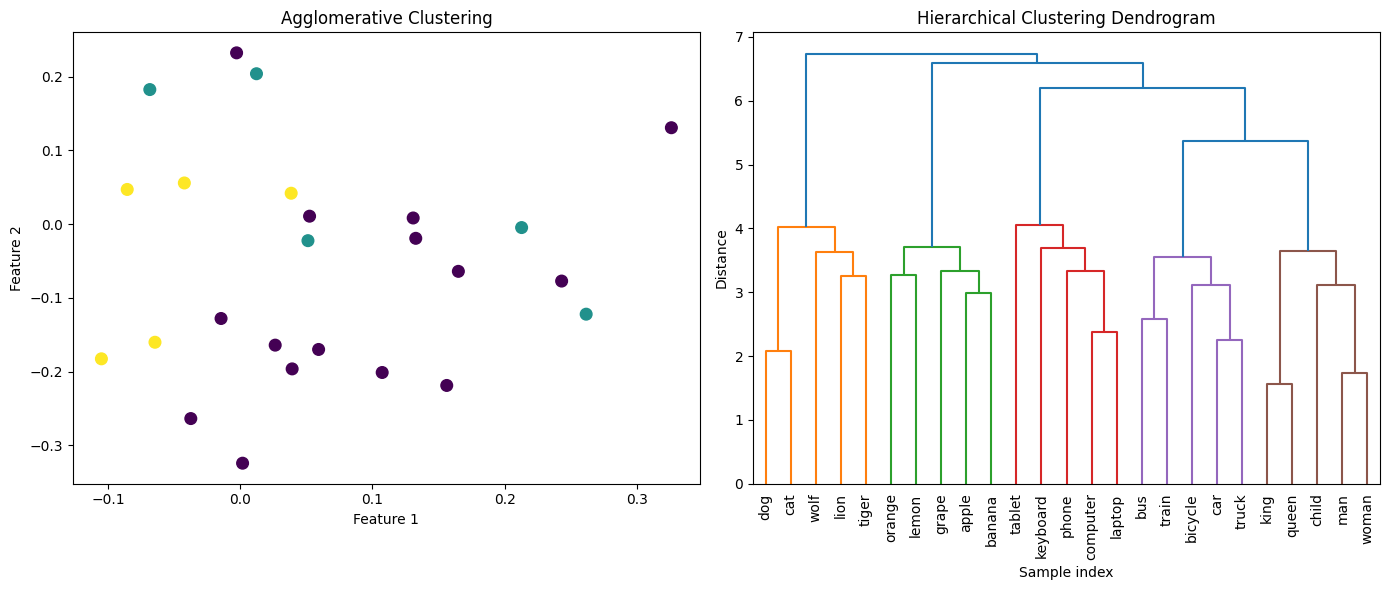

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform


list_of_words = [
    "dog", "cat", "wolf", "lion", "tiger",
    "car", "truck", "bus", "train", "bicycle",
    "apple", "banana", "orange", "grape", "lemon",
    "husband", "wife", "man", "woman", "child",
    "computer", "laptop", "phone", "tablet", "keyboard"
]

X = np.array([wv[word] for word in list_of_words])

distance_matrix = squareform(pdist(X, metric='euclidean'))

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, labels=words, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()